# Spotify Recommender

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, MinMaxScaler

from sklearn.linear_model import LinearRegression

from sklearn.cluster import KMeans 

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.metrics import mean_squared_error as mse, r2_score,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

# Data Acquisition
Download dataset from [Kaggle Website](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks)
Spotify Datset contains information regarding Audio Features of 160000+ songs released in between 1921 and 2021.

> There are ~600k tracks and 1.1M artists in the dataset.
>> tracks.csv (audio features of tracks, 600k rows)<BR>
>> artists.csv (popularity metrics of artists, 1.1M rows)<BR?
>> dict_artists.json (artists related artists, represented by ids)

More on Spotify audio features, [click here](https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-audio-features)
    
More on other Spotify track features, [click here](https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-track)
    

In [2]:
# Read all files and load it to dataframes
df_artists = pd.read_csv('../data/artists.csv')
df_tracks = pd.read_csv('../data/tracks.csv')

# Data Understanding

In [3]:
df_artists.head(5)

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [4]:
df_tracks.head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [5]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [6]:
df_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104349 non-null  object 
 1   followers   1104336 non-null  float64
 2   genres      1104349 non-null  object 
 3   name        1104349 non-null  object 
 4   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 42.1+ MB


# Data Cleaning

In [7]:
df_tracks.artists

0                                 ['Uli']
1                     ['Fernando Pessoa']
2                     ['Ignacio Corsini']
3                     ['Ignacio Corsini']
4                         ['Dick Haymes']
                       ...               
586667                        ['阿YueYue']
586668                     ['ROLE MODEL']
586669                        ['FINNEAS']
586670    ['Gentle Bones', 'Clara Benin']
586671                      ['Afrosound']
Name: artists, Length: 586672, dtype: object

In [8]:
df_tracks['release_date']

0         1922-02-22
1         1922-06-01
2         1922-03-21
3         1922-03-21
4               1922
             ...    
586667    2020-09-26
586668    2020-10-21
586669    2020-09-02
586670    2021-03-05
586671    2015-07-01
Name: release_date, Length: 586672, dtype: object

In [9]:
df_tracks["artists"]=df_tracks["artists"].str.replace("[", "")
df_tracks["artists"]=df_tracks["artists"].str.replace("]", "")
df_tracks["artists"]=df_tracks["artists"].str.replace("'", "")

df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,Uli,['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,Dick Haymes,['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4



# Data Preprocessing

### Do we have any duplicates?

In [10]:
if df_tracks.duplicated().any().sum() != 0:
    print("We found duplicates")
else:
    print("There are no duplicaes")

There are no duplicaes


In [12]:
df_tracks['release_date'] = pd.to_datetime(df_tracks['release_date'], format='%Y-%m-%d', errors='coerce')
type(df_tracks.release_date)

pandas.core.series.Series

In [13]:
corr = df_tracks.corr()

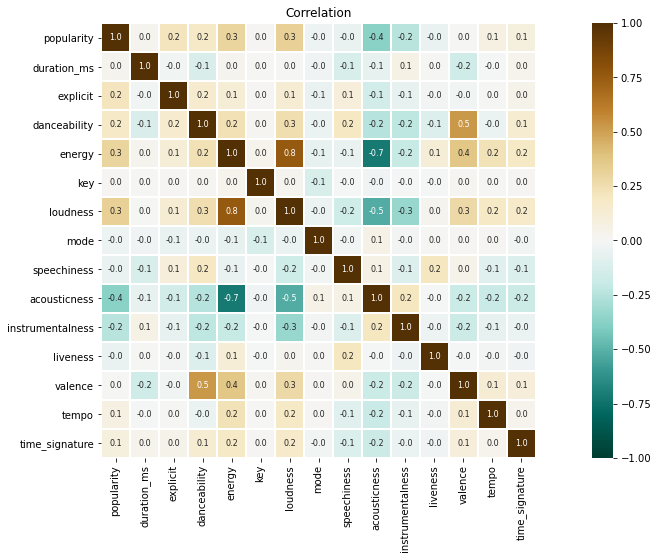

In [14]:
plt.figure(figsize=(20,8))
sns.heatmap(corr, vmax=1, vmin=-1, center=0,linewidth=.5,square=True, annot = True, annot_kws = {'size':8},fmt='.1f', cmap='BrBG_r')
plt.title('Correlation')
plt.show()

<AxesSubplot:xlabel='mode', ylabel='Density'>

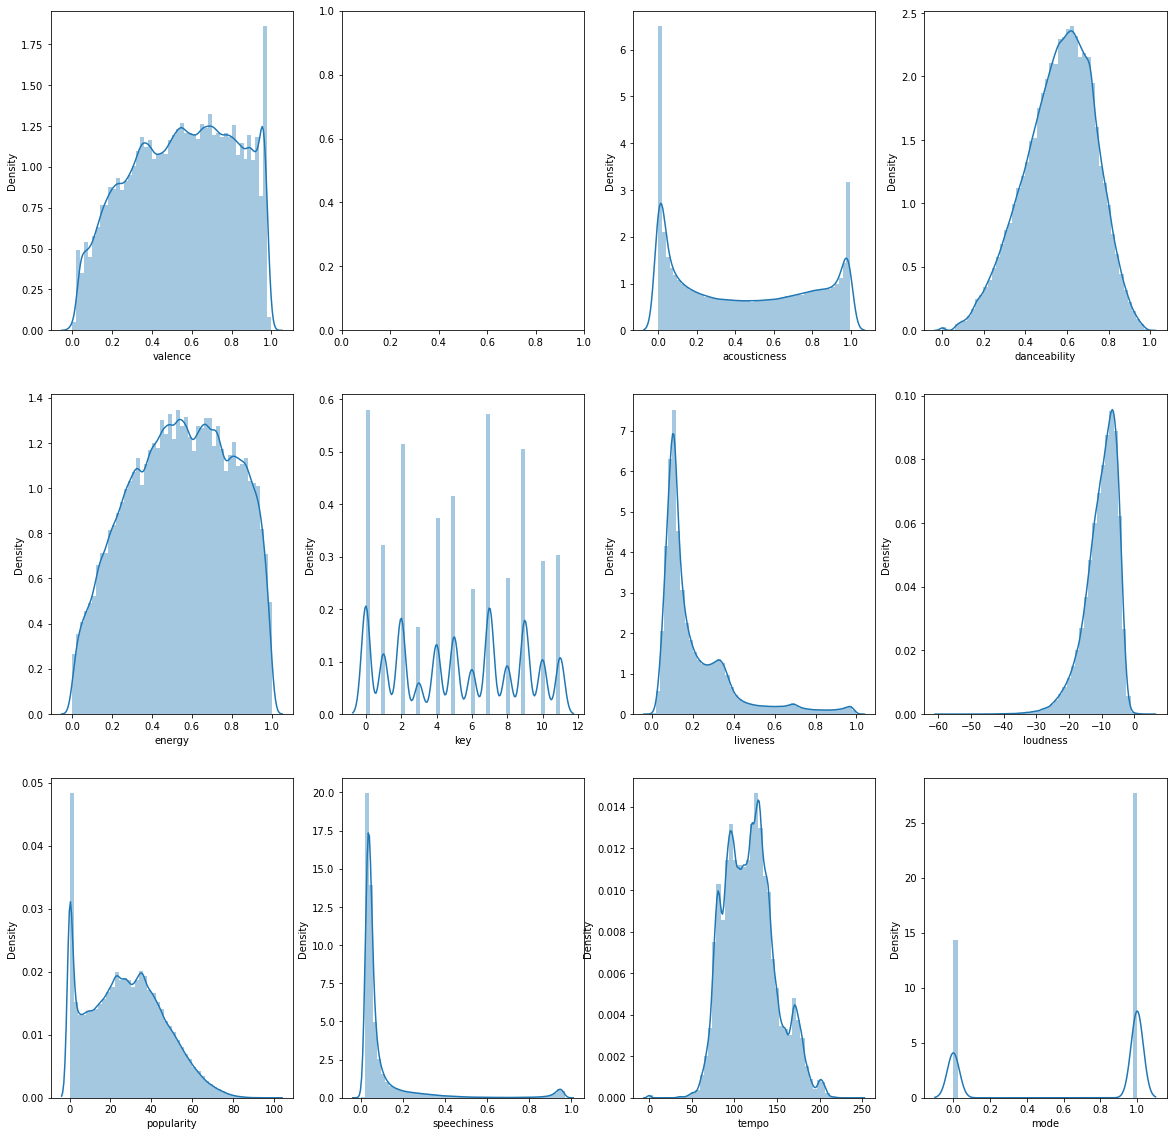

In [15]:
#Visualisation of Variability for each column in the dataframe
fig,ax = plt.subplots(3,4,figsize=(20,20))

sns.distplot(df_tracks['valence'],ax=ax[0,0])
sns.distplot(df_tracks['acousticness'],ax=ax[0,2])
sns.distplot(df_tracks['danceability'],ax=ax[0,3])
sns.distplot(df_tracks['energy'],ax=ax[1,0])
sns.distplot(df_tracks['key'],ax=ax[1,1])
sns.distplot(df_tracks['liveness'],ax=ax[1,2])
sns.distplot(df_tracks['loudness'],ax=ax[1,3])
sns.distplot(df_tracks['popularity'],ax=ax[2,0])
sns.distplot(df_tracks['speechiness'],ax=ax[2,1])
sns.distplot(df_tracks['tempo'],ax=ax[2,2])
sns.distplot(df_tracks['mode'],ax=ax[2,3])


# Data Visualization
For timeseries visualization of artiss, convert data in to 'year'


In [16]:
df_tracks['year'] = df_tracks.apply(lambda row: row.release_date.year, axis = 1)
df_tracks

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,Uli,['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,Dick Haymes,['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,1922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,阿YueYue,['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,...,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,2020
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,ROLE MODEL,['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,...,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,2020
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,FINNEAS,['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,...,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,2020
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"Gentle Bones, Clara Benin","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,...,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,2021


# Data Visualization

### Number of songs released every year

,year
1900,1
1922,294
1923,657
1924,633
1925,903
...,...
2017,9889
2018,10936
2019,11907
2020,13937


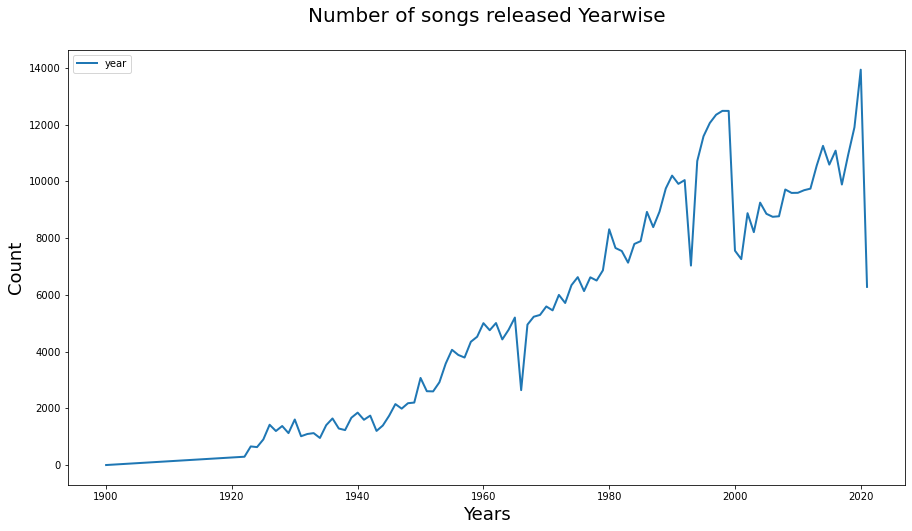

In [17]:
year = pd.DataFrame(df_tracks['year'].value_counts())
year = year.sort_index()
ax=year.plot(kind='line',figsize=(15,8) , linewidth=2)
plt.title("Number of songs released Yearwise",y=1.05,fontsize=20)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Count', fontsize=18)
ax.axes.get_xaxis().set_visible(True)

year

### Popular Tacks

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

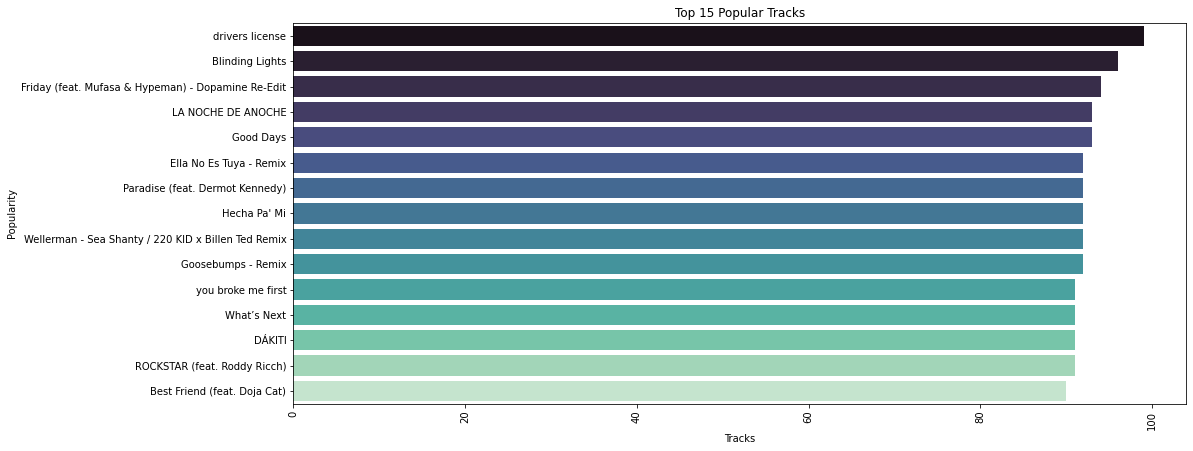

In [18]:
fig, axis = plt.subplots(figsize = (16,7))
popular = df_tracks.groupby("name")['popularity'].mean().sort_values(ascending=False).head(15)
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 15 Popular Tracks')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

### Popular Artists

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

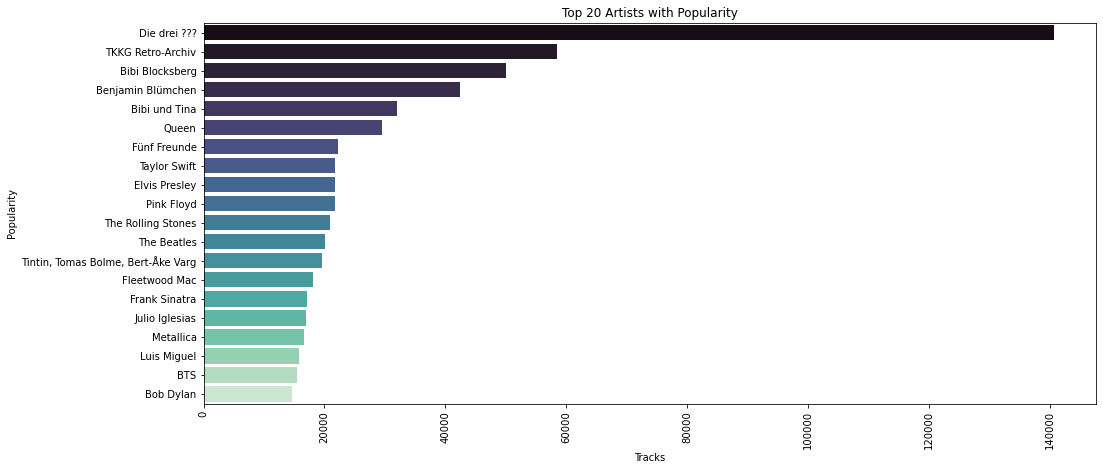

In [19]:
fig, axis = plt.subplots(figsize = (16,7))
popular = df_tracks.groupby("artists")['popularity'].sum().sort_values(ascending=False)[:20]
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 20 Artists with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

In [20]:
df_tracks[df_tracks['artists'] == "Bealles"]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year


# Which artist added more songs in a year?

In [21]:
artists_songs = pd.DataFrame(df_tracks['artists'].value_counts().head(20)).reset_index()
artists_songs.columns=['Artists','Songs_Count']
artists_songs 

,Artists,Songs_Count
0,Die drei ???,3856
1,TKKG Retro-Archiv,2006
2,Benjamin Blümchen,1503
3,Bibi Blocksberg,1472
4,Lata Mangeshkar,1373
5,Bibi und Tina,927
6,"Tintin, Tomas Bolme, Bert-Åke Varg",905
7,Francisco Canaro,891
8,Ella Fitzgerald,870
9,Tadeusz Dolega Mostowicz,838


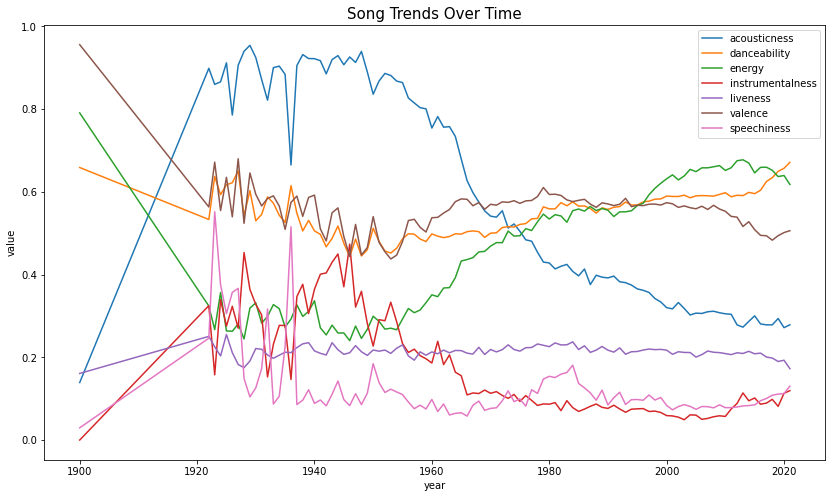

In [22]:
year_avg = df_tracks[["acousticness","danceability","energy", "instrumentalness", 
               "liveness","tempo", "valence", "loudness", "speechiness", "year"]].\
groupby("year").mean().sort_values(by="year").reset_index()

# year_avg.head()
plt.figure(figsize=(14,8))
plt.title("Song Trends Over Time", fontdict={"fontsize": 15})

lines = ["acousticness","danceability","energy", 
         "instrumentalness", "liveness", "valence", "speechiness"]

for line in lines:
    ax = sns.lineplot(x='year', y=line, data=year_avg)
    
    
plt.ylabel("value")
plt.legend(lines)

In [23]:
len(df_tracks)

586672

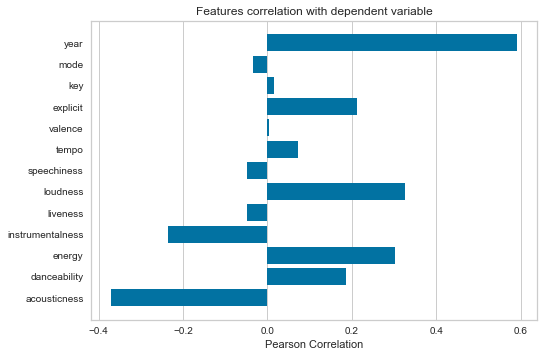

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [27]:
from yellowbrick.target import FeatureCorrelation
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','explicit','key','mode','year']

X, y = df_tracks[feature_names], df_tracks['popularity']

# Create a list of the feature names

features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(30,30)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()

In [28]:
#Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(df_tracks.drop('popularity', axis=1), df_tracks['popularity'], test_size = 0.2, random_state = 42)

In [29]:
X_train.head()

,id,name,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
431626,1UesCGS400XyKjpUG4lth6,Picadeiro do Tempo,206933,0,Geraldo Azevedo,['65TbyndeGrDlFd4IkZNfbN'],1989-03-12,0.700,0.385,0,-13.987,1,0.0310,0.724000,0.000002,0.0605,0.675,90.241,4,1989
481382,2kyiY8sWKqZrdd4tFGKWop,Cunumicita,163600,0,Guisela Santa Cruz,['2CJpzQx9x892GxQyVBGhG0'],2016-01-12,0.637,0.839,2,-4.454,0,0.0344,0.486000,0.000000,0.1840,0.809,87.555,4,2016
41728,5sRPMmQV21r5FhNZSxzZ0O,Elenore - Remastered,149280,0,The Turtles,['2VIoWte1HPDbZ2WqHd2La7'],1968-08-19,0.634,0.586,4,-9.597,1,0.0400,0.616000,0.000159,0.5220,0.864,123.288,4,1968
419851,12NPuci6I4GxnLcDms2p5T,7 Zile,231288,0,Florin Salam,['6Ujb9g9pljLl91qELsPZYo'],2015-12-17,0.820,0.814,10,-5.338,1,0.0397,0.019800,0.000003,0.1750,0.935,140.017,4,2015
172826,00WbLoO3bSlUdAy8al106S,Gently,294000,0,Slipknot,['05fG473iIaoy82BF1aGhL8'],2001-01-01,0.295,0.961,2,-4.605,1,0.0997,0.000024,0.670000,0.2030,0.196,136.882,4,2001


### Popularity Distribution

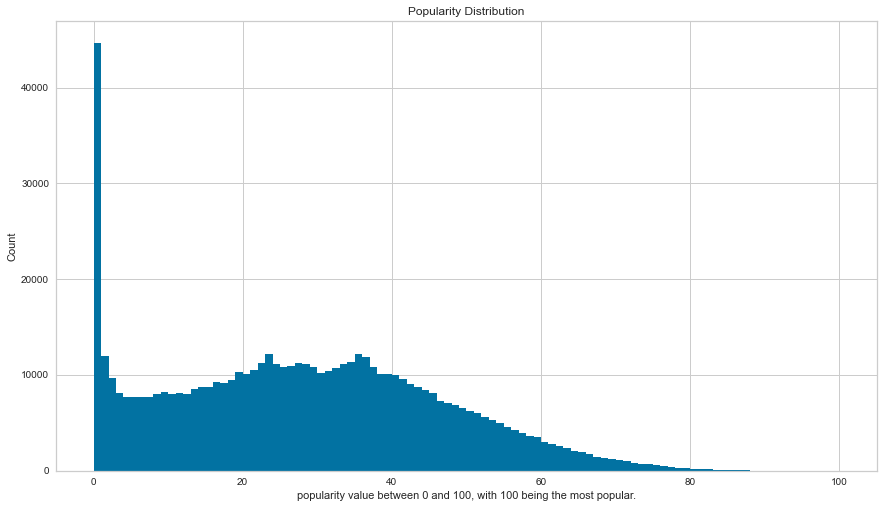

In [33]:
binsize = 1
bins = np.arange(0, df_tracks['popularity'].max()+binsize, binsize)

plt.figure(figsize=[14.70, 8.27])
plt.hist(data = df_tracks, x = 'popularity', bins = bins)
plt.title('Popularity Distribution')
plt.xlabel('popularity value between 0 and 100, with 100 being the most popular.')
plt.ylabel('Count')
plt.show()


### Duration Distribution

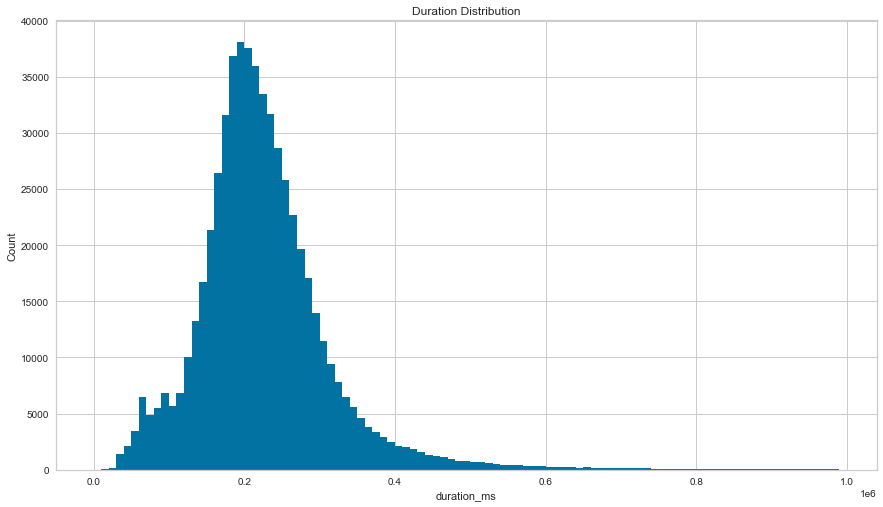

In [35]:
bins = np.arange(0, 1000000, 10000)

plt.figure(figsize=[14.70, 8.27])
plt.hist(data = df_tracks, x = 'duration_ms', bins = bins)
plt.title('Duration Distribution')
plt.xlabel('duration_ms')
plt.ylabel('Count')
plt.show()

### Popularity vs Energy

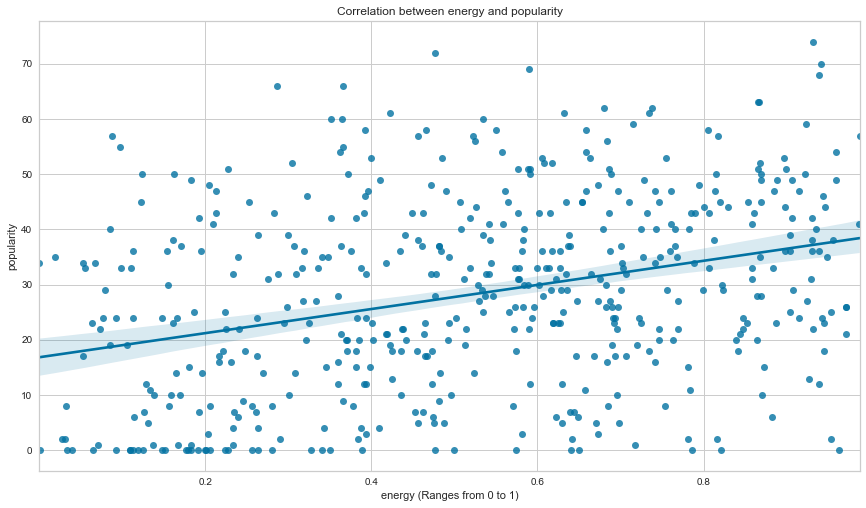

In [37]:
plt.subplots(1,1,figsize=(14.70, 8.27))
ax1 = sns.regplot(data = df_tracks.sample(500), x = 'energy', y = 'popularity');
ax1.set_title('Correlation between energy and popularity');
ax1.set_xlabel('energy (Ranges from 0 to 1)');

### Poularty vs Energy by year

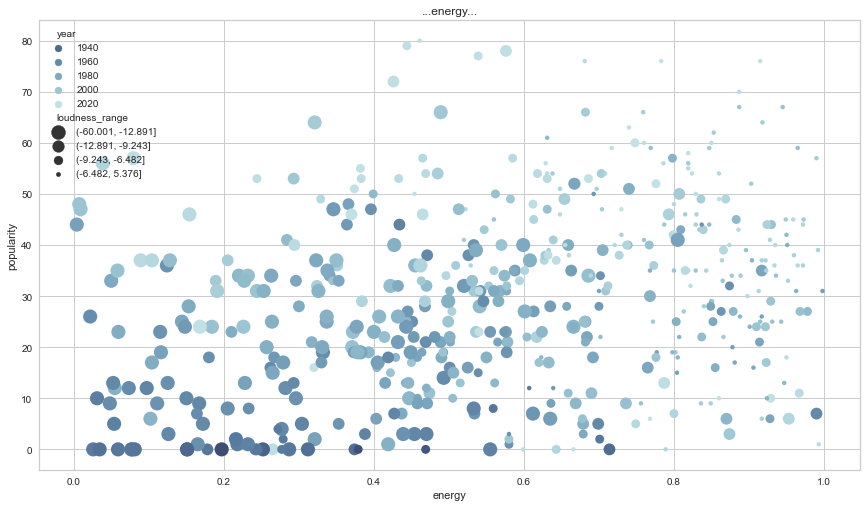

In [41]:
df_tracks['loudness_range'] = pd.qcut(df_tracks['loudness'], q=4)
plt.subplots(1,1,figsize=(14.70, 8.27))
sns.scatterplot(x="energy", y="popularity",
                hue="year", size="loudness_range",
                palette="ch:r=-.2,d=.3_r",
                sizes=(20, 200), linewidth=0,
                data=df_tracks.sample(500)).set(title='...energy...');

### Poularity vs Danceability by year

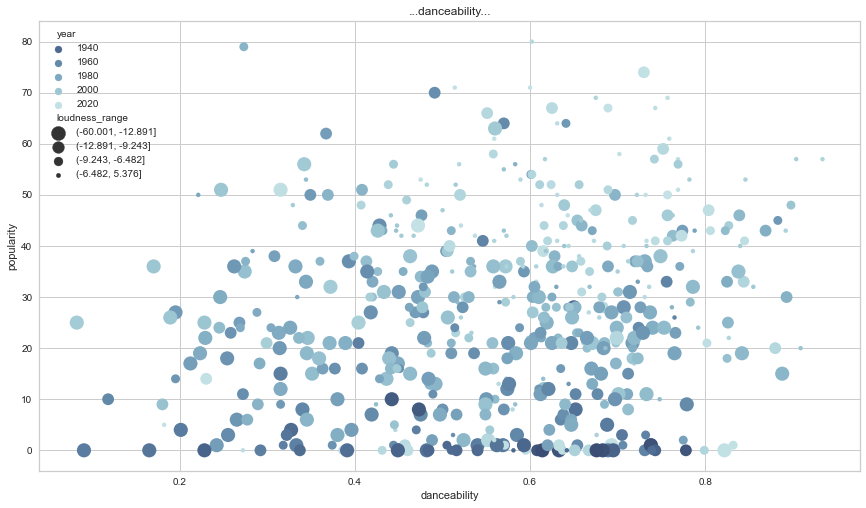

In [43]:
plt.subplots(1,1,figsize=(14.70, 8.27))
sns.scatterplot(x="danceability", y="popularity",
                hue="year", size="loudness_range",
                palette="ch:r=-.2,d=.3_r",
                sizes=(20, 200), linewidth=0,
                data=df_tracks.sample(500)).set(title='...danceability...');

### Loudness vs Popularity

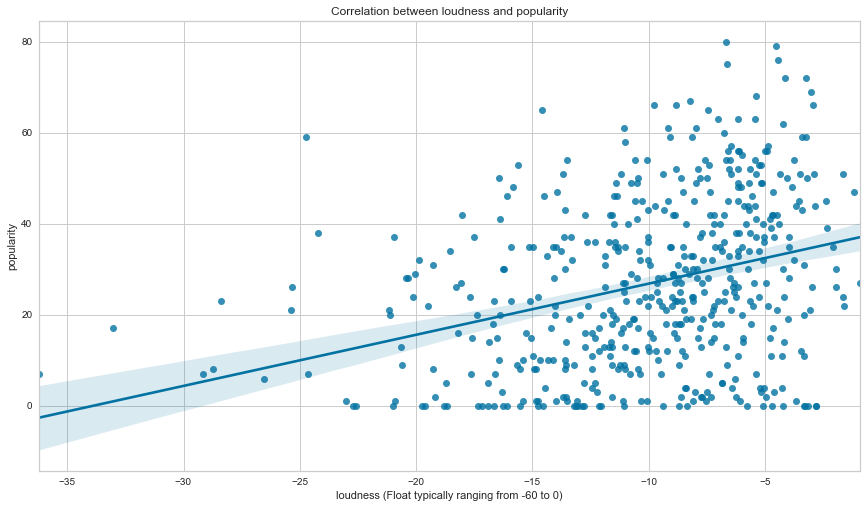

In [38]:
plt.subplots(1,1,figsize=(14.70, 8.27))
ax2 = sns.regplot(data = df_tracks.sample(500), x = 'loudness', y = 'popularity');
ax2.set_title('Correlation between loudness and popularity');
ax2.set_xlabel('loudness (Float typically ranging from -60 to 0)');